In [114]:
import numpy as np 
import pandas as pd

from data import RandomData, AmazonBooks, ToyData, MovieLensData
from model import RandomModel

%matplotlib inline

In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [167]:
ds = AmazonBooks(min_user_ratings=10).get_dataset(verbose=True)
train = ds['train']
val = ds['val']

loading preprocessed dataset from disk


In [168]:
(len(ds['test']['user_product_ratings']),
 len(ds['val']['user_product_ratings']),
 len(ds['train']['user_product_ratings']))

(6297, 6475, 11559)

In [169]:
(len(ds['test']['product_descriptions']),
 len(ds['val']['product_descriptions']),
 len(ds['train']['product_descriptions']))

(4255, 4277, 6568)

In [170]:
(len(ds['test']['product_reviews']),
 len(ds['val']['product_reviews']),
 len(ds['train']['product_reviews']))

(49856, 50077, 67492)

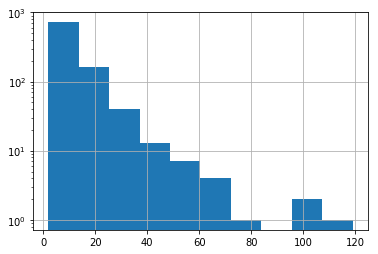

In [171]:
ds['train']['user_product_ratings'].groupby('user_id')['rating'].count().hist(log=True)

### Accuracy Metrics

In [177]:
def mean_squared_error(pred, ground_truth):
    return np.mean((pred - ground_truth) ** 2.)

In [180]:
def accuracy(pred, ground_truth):
    return (np.round(pred) == ground_truth).sum() / float(len(pred))

In [181]:
def evaluate_model(model, train, val, loss_fn):
    model.fit(train)
    val_up_rat = val['user_product_ratings']
    pred = model.predict(val_up_rat[['user_id', 'product_id']])
    loss = loss_fn(pred, val_up_rat.rating)
    return loss

In [182]:
model = RandomModel()
model.fit(train)
evaluate_model(model, train, val, accuracy)

0.1989189189189189